# Vader

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\71487\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


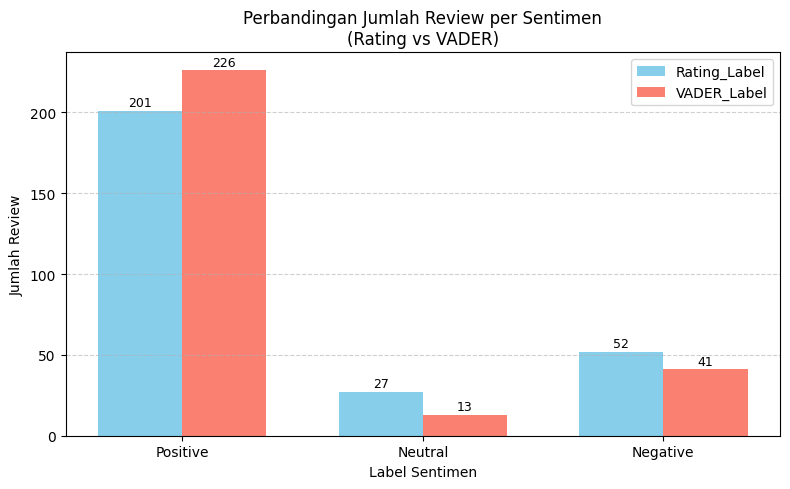

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download lexicon VADER (hanya sekali di awal)
nltk.download('vader_lexicon')

# Step 1: Load dataset
df = pd.read_csv("redmi6.csv", encoding="ISO-8859-1")

# Step 2: Gabungkan review title + comments
df['Full_Review'] = df['Review Title'].astype(str) + " " + df['Comments'].astype(str)

# Step 3: Bersihkan & ubah rating jadi angka
def convert_rating(rating_text):
    try:
        return float(str(rating_text).split()[0])
    except:
        return None

df['Rating_Score'] = df['Rating'].apply(convert_rating)

# Step 4: Buat label dari rating
def rating_to_label(score):
    if pd.isna(score):
        return "Unknown"
    elif score >= 4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

df['Rating_Label'] = df['Rating_Score'].apply(rating_to_label)

# Step 5: Analisis VADER
vader = SentimentIntensityAnalyzer()

# Simpan skor compound VADER
df['VADER_Score'] = df['Full_Review'].apply(lambda x: vader.polarity_scores(x)['compound'])

# Konversi skor menjadi label
def vader_to_label(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['VADER_Label'] = df['VADER_Score'].apply(vader_to_label)

# Step 6: Ambil data valid
df_valid = df[(df['Rating_Label'] != "Unknown") & (df['VADER_Label'].notna())]

# Step 7: Hitung jumlah label
labels = ['Positive', 'Neutral', 'Negative']
vader_counts = df_valid['VADER_Label'].value_counts().reindex(labels, fill_value=0)
rating_counts = df_valid['Rating_Label'].value_counts().reindex(labels, fill_value=0)

# Step 8: Side-by-side bar chart
x = range(len(labels))
bar_width = 0.35

plt.figure(figsize=(8, 5))
bars1 = plt.bar([i - bar_width/2 for i in x], rating_counts, width=bar_width, label='Rating_Label', color='skyblue')
bars2 = plt.bar([i + bar_width/2 for i in x], vader_counts, width=bar_width, label='VADER_Label', color='salmon')

# Tambahkan angka di atas bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, int(bar.get_height()), ha='center', va='bottom', fontsize=9)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, int(bar.get_height()), ha='center', va='bottom', fontsize=9)

plt.title('Perbandingan Jumlah Review per Sentimen\n(Rating vs VADER)')
plt.xticks(ticks=x, labels=labels)
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Review')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
df

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,Full_Review,Rating_Score,Rating_Label,VADER_Score,VADER_Label
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,,Another Midrange killer Smartphone by Xiaomi A...,4.0,Positive,0.9980,Positive
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,vry small size mobile All ok but vry small siz...,3.0,Neutral,0.1531,Positive
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful,Full display not working in all application. Q...,3.0,Neutral,0.4927,Positive
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful,Value for Money Redmi has always have been the...,5.0,Positive,0.9677,Positive
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,Not worth for the money worst product from MI....,2.0,Negative,-0.7889,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
275,"Cemera quality,face unlock most important in t...",Rahul,5.0 out of 5 stars,on 19 September 2018,Others,"I like This Phone, Awesome look and design.\nI...",NaN,"Cemera quality,face unlock most important in t...",5.0,Positive,0.8268,Positive
276,Mi is best phone,Sunil Soni,4.0 out of 5 stars,on 18 September 2018,Others,Product is avasome but invoice is note include...,NaN,Mi is best phone Product is avasome but invoic...,4.0,Positive,0.3818,Positive
277,Its a OK Phone,D.C.Padhi,3.0 out of 5 stars,on 15 September 2018,Battery,"Redmi Note4, Note5, now 6pro..It seems the old...",NaN,"Its a OK Phone Redmi Note4, Note5, now 6pro..I...",3.0,Neutral,0.4592,Positive
278,Redmi,Mahesh,5.0 out of 5 stars,on 21 September 2018,Others,I love mi,NaN,Redmi I love mi,5.0,Positive,0.6369,Positive


In [11]:
df

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,Full_Review,Rating_Score,Rating_Label,VADER_Score,VADER_Label
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,,Another Midrange killer Smartphone by Xiaomi A...,4.0,Positive,0.9980,Positive
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,vry small size mobile All ok but vry small siz...,3.0,Neutral,0.1531,Positive
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful,Full display not working in all application. Q...,3.0,Neutral,0.4927,Positive
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful,Value for Money Redmi has always have been the...,5.0,Positive,0.9677,Positive
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,Not worth for the money worst product from MI....,2.0,Negative,-0.7889,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
275,"Cemera quality,face unlock most important in t...",Rahul,5.0 out of 5 stars,on 19 September 2018,Others,"I like This Phone, Awesome look and design.\nI...",NaN,"Cemera quality,face unlock most important in t...",5.0,Positive,0.8268,Positive
276,Mi is best phone,Sunil Soni,4.0 out of 5 stars,on 18 September 2018,Others,Product is avasome but invoice is note include...,NaN,Mi is best phone Product is avasome but invoic...,4.0,Positive,0.3818,Positive
277,Its a OK Phone,D.C.Padhi,3.0 out of 5 stars,on 15 September 2018,Battery,"Redmi Note4, Note5, now 6pro..It seems the old...",NaN,"Its a OK Phone Redmi Note4, Note5, now 6pro..I...",3.0,Neutral,0.4592,Positive
278,Redmi,Mahesh,5.0 out of 5 stars,on 21 September 2018,Others,I love mi,NaN,Redmi I love mi,5.0,Positive,0.6369,Positive


In [2]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv("redmi6.csv", encoding="ISO-8859-1")

# Gabungkan kolom untuk review penuh
df['Full_Review'] = df['Review Title'].astype(str) + " " + df['Comments'].astype(str)

# Inisialisasi VADER
vader = SentimentIntensityAnalyzer()

# Hitung skor compound
df['VADER_Score'] = df['Full_Review'].apply(lambda x: vader.polarity_scores(x)['compound'])

# Kategorikan skor
def vader_label(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['VADER_Label'] = df['VADER_Score'].apply(vader_label)

# Lihat contoh
print(df[['Full_Review', 'VADER_Score', 'VADER_Label']].tail())


                                           Full_Review  VADER_Score  \
275  Cemera quality,face unlock most important in t...       0.8268   
276  Mi is best phone Product is avasome but invoic...       0.3818   
277  Its a OK Phone Redmi Note4, Note5, now 6pro..I...       0.4592   
278                                    Redmi I love mi       0.6369   
279  Not worth for the price. Same old configuratio...      -0.2115   

    VADER_Label  
275    Positive  
276    Positive  
277    Positive  
278    Positive  
279    Negative  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\71487\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


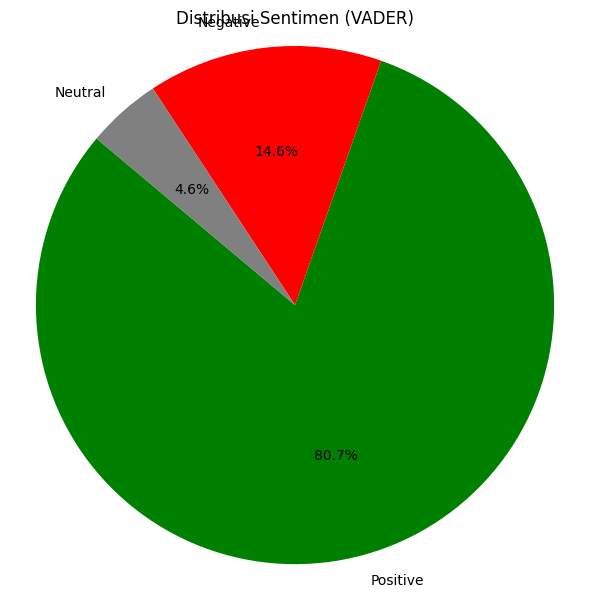

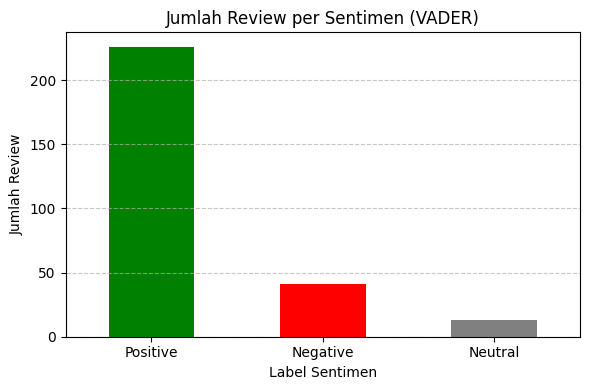

In [3]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing label
vader_counts = df['VADER_Label'].value_counts()

# Pie Chart
plt.figure(figsize=(6, 6))
colors = ['green', 'red', 'gray']
plt.pie(vader_counts, labels=vader_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribusi Sentimen (VADER)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Bar Chart
plt.figure(figsize=(6, 4))
vader_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Jumlah Review per Sentimen (VADER)')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv("redmi6.csv", encoding="ISO-8859-1")

# ===============================
# 1. Buat label berdasarkan Rating
# ===============================
def rating_to_sentiment(rating_text):
    try:
        rating = float(str(rating_text).split()[0])  # ambil angka dari "4.0 out of 5 stars"
    except:
        return "Unknown"

    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:  # 4 or 5
        return 'Positive'

df['Rating_Label'] = df['Rating'].apply(rating_to_sentiment)

# ===============================
# 2. VADER berdasarkan Full Review
# ===============================
# Gabungkan kolom review title dan comment
df['Full_Review'] = df['Review Title'].astype(str) + " " + df['Comments'].astype(str)

# Inisialisasi VADER
vader = SentimentIntensityAnalyzer()

# Hitung compound score
df['VADER_Score'] = df['Full_Review'].apply(lambda x: vader.polarity_scores(x)['compound'])

# Kategorikan VADER label
def vader_label(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['VADER_Label'] = df['VADER_Score'].apply(vader_label)

# ===============================
# 3. Evaluasi Performa VADER vs Rating
# ===============================
# Filter hanya baris yang punya label rating valid
df_filtered = df[df['Rating_Label'] != "Unknown"]

# Evaluasi
y_true = df_filtered['Rating_Label']
y_pred = df_filtered['VADER_Label']

print("=== Classification Report ===")
print(classification_report(y_true, y_pred))

print("=== Accuracy Score ===")
print("Akurasi VADER terhadap label rating:", accuracy_score(y_true, y_pred))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_true, y_pred))

# (Opsional) Simpan hasil ke CSV
# df_filtered.to_csv("hasil_sentimen_vader_vs_rating.csv", index=False)


=== Classification Report ===
              precision    recall  f1-score   support

    Negative       0.83      0.65      0.73        52
     Neutral       0.08      0.04      0.05        27
    Positive       0.85      0.95      0.89       201

    accuracy                           0.81       280
   macro avg       0.58      0.55      0.56       280
weighted avg       0.77      0.81      0.78       280

=== Accuracy Score ===
Akurasi VADER terhadap label rating: 0.8071428571428572
=== Confusion Matrix ===
[[ 34   5  13]
 [  4   1  22]
 [  3   7 191]]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\71487\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Filter data yang valid
df_valid = df[(df['Rating_Label'] != "Unknown") & (df['VADER_Label'].notna())]

# Label asli dan prediksi
y_true = df_valid['Rating_Label']
y_pred = df_valid['VADER_Label']
labels = ['Positive', 'Neutral', 'Negative']

# Classification report
report = classification_report(y_true, y_pred, labels=labels, output_dict=True)
report_df = pd.DataFrame(report).T

# Ambil hanya baris yang kita butuhkan (tanpa avg)
report_df = report_df.loc[labels]

# Tambahkan kolom error rate
report_df['error_rate'] = 1 - report_df['recall']

# Tampilkan
print(report_df[['precision', 'recall', 'f1-score', 'support', 'error_rate']])


          precision    recall  f1-score  support  error_rate
Positive   0.845133  0.950249  0.894614    201.0    0.049751
Neutral    0.076923  0.037037  0.050000     27.0    0.962963
Negative   0.829268  0.653846  0.731183     52.0    0.346154


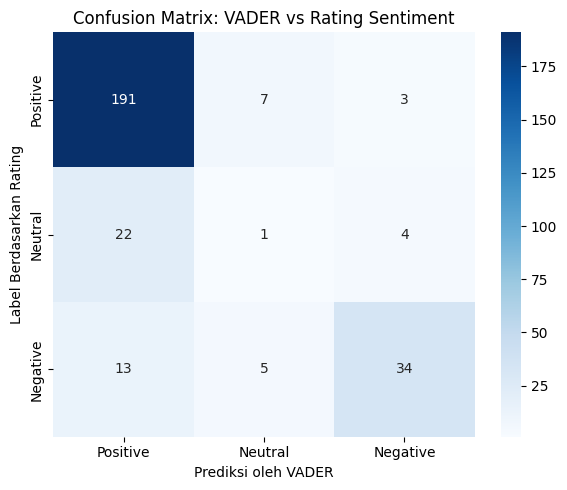

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil data yang valid
df_filtered = df[df['Rating_Label'] != "Unknown"]
y_true = df_filtered['Rating_Label']
y_pred = df_filtered['VADER_Label']

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['Positive', 'Neutral', 'Negative'])

# Buat heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])

plt.title('Confusion Matrix: VADER vs Rating Sentiment')
plt.xlabel('Prediksi oleh VADER')
plt.ylabel('Label Berdasarkan Rating')
plt.tight_layout()
plt.show()


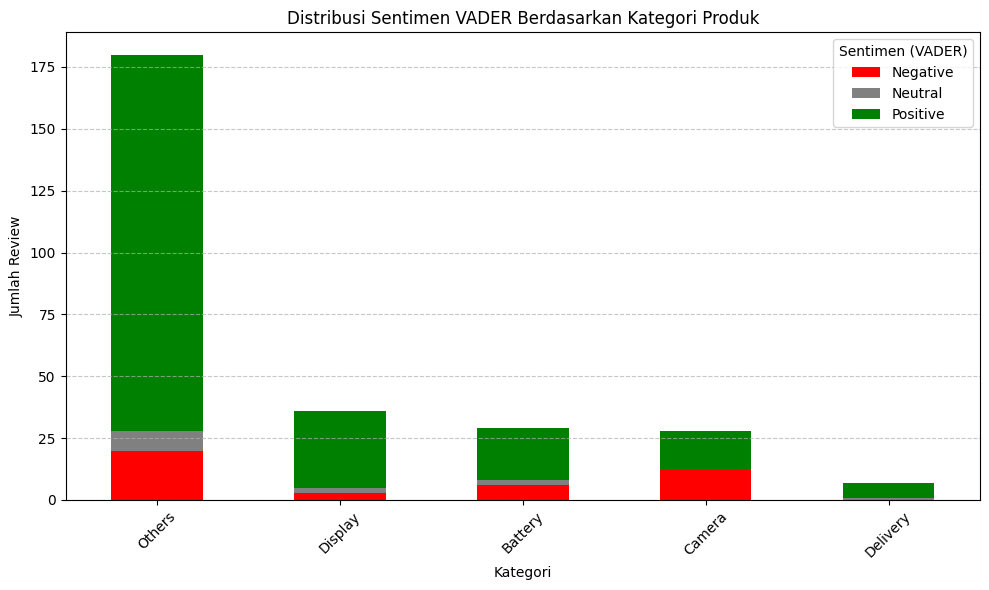

In [7]:
import matplotlib.pyplot as plt

# Ambil data yang rating-nya valid
df_filtered = df[df['Rating_Label'] != "Unknown"]

# Hitung jumlah label VADER per kategori
category_sentiment = df_filtered.groupby(['Category', 'VADER_Label']).size().unstack(fill_value=0)

# Urutkan berdasarkan total review per kategori
category_sentiment = category_sentiment.loc[category_sentiment.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
category_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6),
                        color={'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'})

plt.title('Distribusi Sentimen VADER Berdasarkan Kategori Produk')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=45)
plt.legend(title='Sentimen (VADER)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


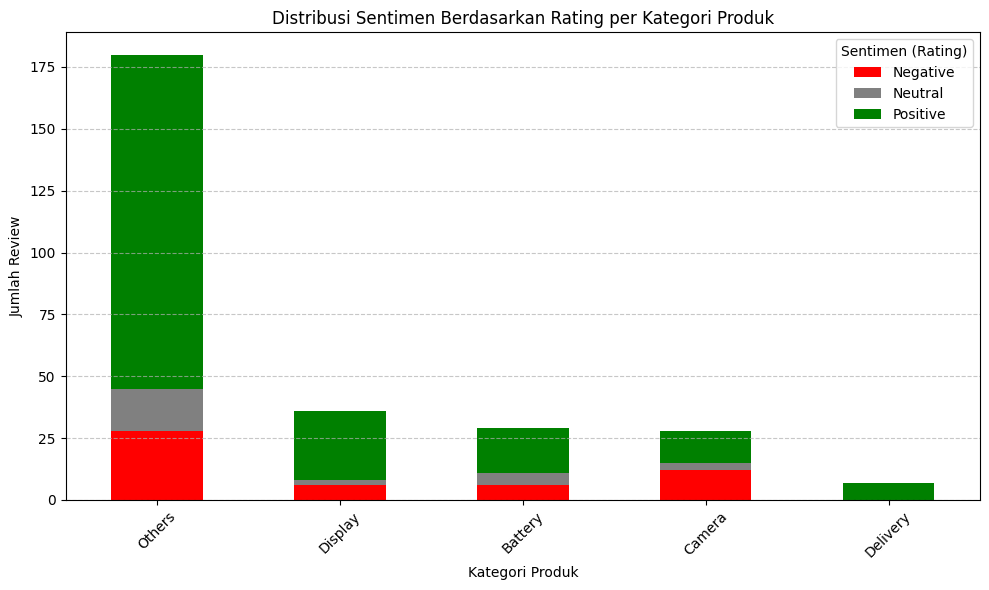

In [8]:
import matplotlib.pyplot as plt

# 1. Pastikan Rating_Label sudah ada (bisa skip ini kalau sebelumnya sudah dijalankan)
def rating_to_sentiment(rating_text):
    try:
        rating = float(str(rating_text).split()[0])  # Ambil angka rating dari "4.0 out of 5 stars"
    except:
        return "Unknown"
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Rating_Label'] = df['Rating'].apply(rating_to_sentiment)

# 2. Filter data yang rating-nya valid
df_filtered = df[df['Rating_Label'] != "Unknown"]

# 3. Hitung jumlah label per kategori
category_sentiment_rating = df_filtered.groupby(['Category', 'Rating_Label']).size().unstack(fill_value=0)

# 4. Urutkan berdasarkan total review per kategori
category_sentiment_rating = category_sentiment_rating.loc[category_sentiment_rating.sum(axis=1).sort_values(ascending=False).index]

# 5. Visualisasi
category_sentiment_rating.plot(kind='bar', stacked=True, figsize=(10, 6),
                                color={'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'})

plt.title('Distribusi Sentimen Berdasarkan Rating per Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=45)
plt.legend(title='Sentimen (Rating)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# Pastikan data sudah punya kolom: Rating_Label dan VADER_Label
# Filter data yang valid
df_valid = df[(df['Rating_Label'] != "Unknown") & (df['VADER_Label'].notna())]

# Hitung akurasi per kategori
category_accuracy = {}

for category in df_valid['Category'].unique():
    subset = df_valid[df_valid['Category'] == category]
    total = len(subset)
    benar = (subset['Rating_Label'] == subset['VADER_Label']).sum()
    akurasi = benar / total if total > 0 else 0
    category_accuracy[category] = round(akurasi, 3)

# Ubah jadi DataFrame dan urutkan
accuracy_df = pd.DataFrame.from_dict(category_accuracy, orient='index', columns=['Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Tampilkan
print(accuracy_df)


          Accuracy
Display      0.861
Delivery     0.857
Others       0.806
Camera       0.786
Battery      0.759


In [10]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download lexicon VADER
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv("redmi6.csv", encoding="ISO-8859-1")
df['Full_Review'] = df['Review Title'].astype(str) + " " + df['Comments'].astype(str)

# Buat label dari rating
def rating_to_sentiment(rating_text):
    try:
        rating = float(str(rating_text).split()[0])
    except:
        return "Unknown"
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Rating_Label'] = df['Rating'].apply(rating_to_sentiment)

# Hitung VADER
vader = SentimentIntensityAnalyzer()
df['VADER_Score'] = df['Full_Review'].apply(lambda x: vader.polarity_scores(x)['compound'])

def vader_label(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['VADER_Label'] = df['VADER_Score'].apply(vader_label)

# === ANALISIS PER KATEGORI ===
df_valid = df[(df['Rating_Label'] != "Unknown") & (df['VADER_Label'].notna())]

results = []

for category in df_valid['Category'].unique():
    subset = df_valid[df_valid['Category'] == category]
    total = len(subset)

    rating_counts = subset['Rating_Label'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)
    vader_counts = subset['VADER_Label'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)

    rating_prop = (rating_counts / total).round(3)
    vader_prop = (vader_counts / total).round(3)

    mismatch = (subset['Rating_Label'] != subset['VADER_Label'])
    mismatched_subset = subset[mismatch]
    error_counts = mismatched_subset['Rating_Label'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)
    most_error = error_counts.idxmax() if error_counts.sum() > 0 else 'None'

    results.append({
        'Category': category,
        'Total_Review': total,
        'Rating_Positive': rating_counts['Positive'],
        'Rating_Neutral': rating_counts['Neutral'],
        'Rating_Negative': rating_counts['Negative'],
        'Rating_Pos_Prop': rating_prop['Positive'],
        'Rating_Neu_Prop': rating_prop['Neutral'],
        'Rating_Neg_Prop': rating_prop['Negative'],
        'VADER_Positive': vader_counts['Positive'],
        'VADER_Neutral': vader_counts['Neutral'],
        'VADER_Negative': vader_counts['Negative'],
        'VADER_Pos_Prop': vader_prop['Positive'],
        'VADER_Neu_Prop': vader_prop['Neutral'],
        'VADER_Neg_Prop': vader_prop['Negative'],
        'Most_Common_Misclassification': most_error
    })

# Simpan ke DataFrame
summary_df = pd.DataFrame(results)
summary_df = summary_df.sort_values(by='Total_Review', ascending=False)

# Tampilkan hasil
print(summary_df)


   Category  Total_Review  Rating_Positive  Rating_Neutral  Rating_Negative  \
1    Others           180              135              17               28   
0   Display            36               28               2                6   
3   Battery            29               18               5                6   
2    Camera            28               13               3               12   
4  Delivery             7                7               0                0   

   Rating_Pos_Prop  Rating_Neu_Prop  Rating_Neg_Prop  VADER_Positive  \
1            0.750            0.094            0.156             152   
0            0.778            0.056            0.167              31   
3            0.621            0.172            0.207              21   
2            0.464            0.107            0.429              16   
4            1.000            0.000            0.000               6   

   VADER_Neutral  VADER_Negative  VADER_Pos_Prop  VADER_Neu_Prop  \
1              8        

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\71487\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
print(df)

                                          Review Title  \
0         Another Midrange killer Smartphone by Xiaomi   
1                                vry small size mobile   
2         Full display not working in all application.   
3                                      Value for Money   
4                              Not worth for the money   
..                                                 ...   
275  Cemera quality,face unlock most important in t...   
276                                   Mi is best phone   
277                                     Its a OK Phone   
278                                              Redmi   
279                           Not worth for the price.   

                Customer name              Rating                  Date  \
0           Rishikumar Thakur  4.0 out of 5 stars     on 1 October 2018   
1                     Raza ji  3.0 out of 5 stars  on 15 September 2018   
2               Vaibhav Patel  3.0 out of 5 stars  on 18 September 2018   
3  

# Testing

In [15]:
# Ambil data yang valid
df_valid = df[(df['Rating_Label'] != "Unknown") & (df['VADER_Label'].notna())]

# Hitung total data per label rating
label_total = df_valid['Rating_Label'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)

# Hitung yang berbeda antara VADER dan rating per label rating
mismatch_mask = df_valid['Rating_Label'] != df_valid['VADER_Label']
mismatch_df = df_valid[mismatch_mask]
mismatch_counts = mismatch_df['Rating_Label'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)

# Gabungkan ke satu tabel
error_analysis = pd.DataFrame({
    'Total': label_total,
    'Mismatch': mismatch_counts,
})
error_analysis['Error_Rate'] = (error_analysis['Mismatch'] / error_analysis['Total']).round(3)

print(error_analysis)

              Total  Mismatch  Error_Rate
Rating_Label                             
Positive        201        10       0.050
Neutral          27        26       0.963
Negative         52        18       0.346


In [16]:
# Filter data valid
df_valid = df[(df['Rating_Label'] != "Unknown") & (df['VADER_Label'].notna())]

# Ambil baris yang Rating_Label = Neutral tapi VADER_Label ≠ Neutral
neutral_errors = df_valid[(df_valid['Rating_Label'] == 'Neutral') & 
                          (df_valid['VADER_Label'] != 'Neutral')]

# Tampilkan beberapa contoh
print(neutral_errors[['Full_Review', 'Rating_Label', 'VADER_Label', 'VADER_Score']].head(10))

                                          Full_Review Rating_Label  \
1   vry small size mobile All ok but vry small siz...      Neutral   
2   Full display not working in all application. Q...      Neutral   
5   Redmi 6 pro (3/32 GB) review after using for o...      Neutral   
11  vry small size mobile All ok but vry small siz...      Neutral   
12  Full display not working in all application. Q...      Neutral   
15  Redmi 6 pro (3/32 GB) review after using for o...      Neutral   
26  Design can be better The product is great with...      Neutral   
27  Mi 6pro review Camera clarity is not good and ...      Neutral   
39  Redmi Pro 6 Awesome sound quality , battery li...      Neutral   
49  Redmi Pro 6 Awesome sound quality , battery li...      Neutral   

   VADER_Label  VADER_Score  
1     Positive       0.1531  
2     Positive       0.4927  
5     Positive       0.9456  
11    Positive       0.1531  
12    Positive       0.4927  
15    Positive       0.9456  
26    Positive     